In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

In [3]:
def create_dataset(hm,varience,step=2,correlation=False):
    val=1
    ys=[]
    for i in range(hm):
        y=val+random.randrange(-varience,varience)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    xs=[i for i in range(len(ys))]
    return np.array(xs,dtype=np.float64),np.array(ys,dtype = np.float64)

In [4]:
def best_fit_line_and_intercept (xs,ys):
    m=( ((mean(xs)*mean(ys))- mean(xs*ys))/
        ((mean(xs)*mean(xs)) - mean(xs**2)))
    b=(mean(ys)-m*mean(xs))
    return m,b


In [5]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line-ys_orig)**2)

In [6]:
def cofficient_of_determination(ys_orig,ys_line):
    y_mean_line=[mean(ys_orig) for y in ys_orig]
    squared_error_reg=squared_error(ys_orig,ys_line)
    squared_error_y_mean=squared_error(ys_orig,y_mean_line)
    return 1-(squared_error_reg/squared_error_y_mean)


In [7]:
xs,ys=create_dataset(40,40,2,correlation='pos')

In [8]:
m,b=best_fit_line_and_intercept(xs,ys)

In [9]:
print(m,b)

1.578142589118199 6.001219512195117


In [10]:
regression_line=[(m*x)+b for x in xs]

In [11]:
predict_x=8
predict_y=(m*predict_x)+b

In [12]:
r_squared=cofficient_of_determination(ys,regression_line)
r_squared

0.42613582362567237

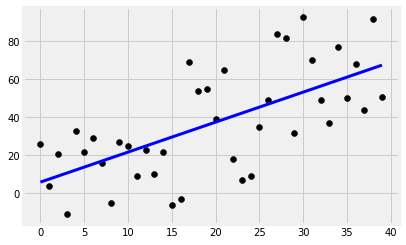

In [13]:
plt.scatter(xs,ys,color='black')
# plt.scatter(predict_x,predict_y,color='g')
plt.plot(xs,regression_line,color='blue', linewidth=3)
plt.show()